In [57]:
import numpy as np  
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style(style='darkgrid')

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random

In [58]:
df_train = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
df_test = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')
df_train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [59]:
df_train.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

# Weeks Columns

0.8238523319233266
0.20679397221407347


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



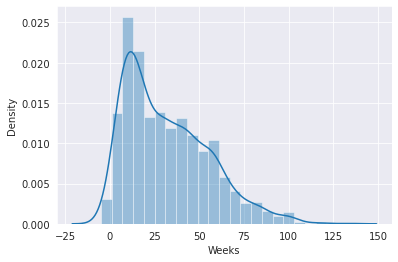

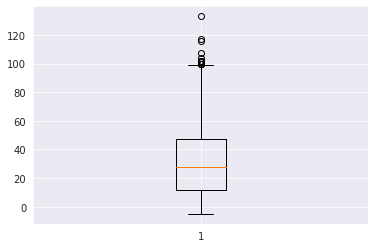

In [60]:
print(df_train.Weeks.skew()) # [0.5, 1] it is moderately skewed!
print(df_train.Weeks.kurt()) # it has leptokurtic distribution

sns.distplot(df_train.Weeks)
plt.show()

plt.boxplot(df_train.Weeks)
plt.show()


from the graph the outlier seems to be abover the upper whisker

In [61]:
df_train.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [62]:
df_train[df_train.Weeks>100] # The outlier in the weeks column

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
350,ID00099637202206203080121,102,2833,79.382425,68,Male,Ex-smoker
395,ID00109637202210454292264,107,1725,44.898490,73,Male,Ex-smoker
455,ID00123637202217151272140,102,1566,54.162487,69,Female,Never smoked
523,ID00131637202220424084844,101,3208,67.006433,61,Male,Never smoked
524,ID00131637202220424084844,116,2990,62.453004,61,Male,Never smoked
622,ID00165637202237320314458,104,2296,58.769325,54,Male,Ex-smoker
623,ID00165637202237320314458,117,2129,54.494727,54,Male,Ex-smoker
624,ID00165637202237320314458,133,2184,55.902529,54,Male,Ex-smoker
1012,ID00275637202271440119890,102,1648,65.508606,62,Female,Never smoked
1395,ID00383637202300493233675,102,3036,107.732160,64,Female,Never smoked


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



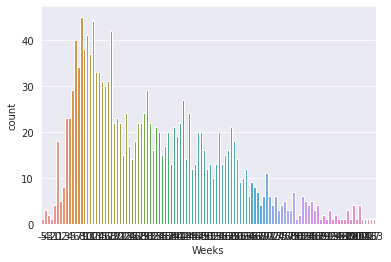

In [63]:
sns.countplot(df_train.Weeks)
plt.show()

# FVC Columns

0.5842714374623427
0.5719853718413428


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



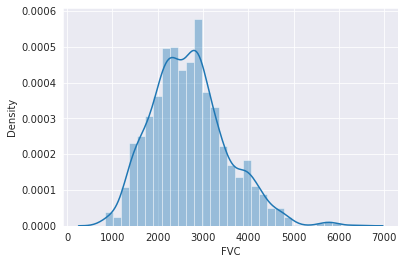

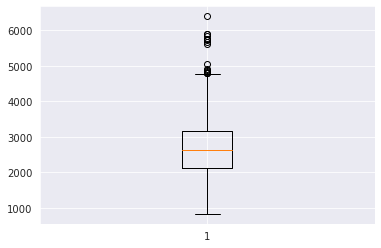

In [64]:
print(df_train.FVC.skew()) # [0.5, 1] it is moderately skewed!
print(df_train.FVC.kurt()) # it has leptokurtic distribution

sns.distplot(df_train.FVC)
plt.show()

plt.boxplot(df_train.FVC)
plt.show()

In [65]:
df_train[df_train.FVC>4750] # The outlier in the weeks column

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
124,ID00032637202181710233084,30,5045,119.629138,63,Male,Ex-smoker
125,ID00032637202181710233084,35,4825,114.412406,63,Male,Ex-smoker
126,ID00032637202181710233084,37,4876,115.621740,63,Male,Ex-smoker
128,ID00032637202181710233084,41,4753,112.705112,63,Male,Ex-smoker
332,ID00094637202205333947361,0,4916,117.293377,64,Male,Ex-smoker
333,ID00094637202205333947361,6,4799,114.501813,64,Male,Ex-smoker
335,ID00094637202205333947361,11,4856,115.861806,64,Male,Ex-smoker
337,ID00094637202205333947361,18,4756,113.475854,64,Male,Ex-smoker
338,ID00094637202205333947361,30,4753,113.404276,64,Male,Ex-smoker
340,ID00094637202205333947361,58,4752,113.380416,64,Male,Ex-smoker


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



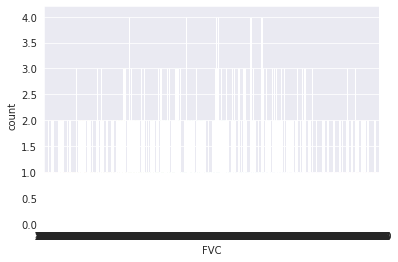

In [66]:
sns.countplot(df_train.FVC)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).





 the skewness of Weeks is 0.8238523319233266


 the kurtosis of Weeks is 0.20679397221407347


 the skewness of FVC is 0.5842714374623427


 the kurtosis of FVC is 0.5719853718413428


 the skewness of Percent is 0.8582072685458989


 the kurtosis of Percent is 0.8897144753762225


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).





 the skewness of Age is -0.04617524697867629


 the kurtosis of Age is 0.0672190816307392


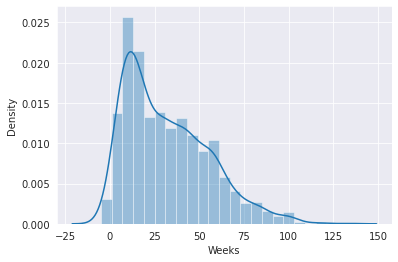

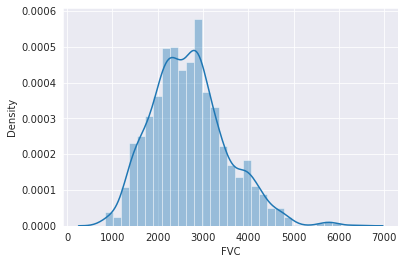

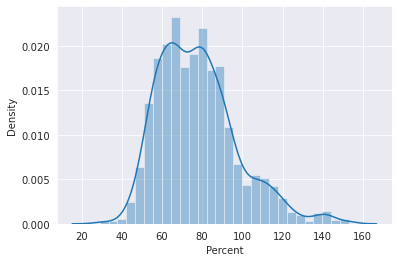

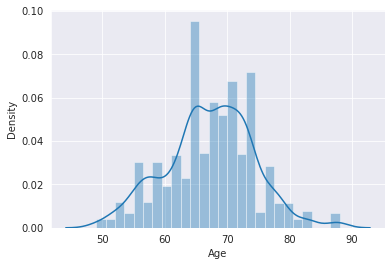

In [67]:
numerical_features = ['Weeks','FVC','Percent','Age']
for i in df_train[numerical_features]:
    plt.subplots()
    sns.distplot(df_train[i])
    print('\n')
    print(f" the skewness of {i} is {df_train[i].skew()}")
    print('\n')
    print(f" the kurtosis of {i} is {df_train[i].kurt()}")
    

In [68]:
plt.figure(figsize=(8,8))
fig = px.pie(df_train,names='SmokingStatus')
fig.show()

<Figure size 576x576 with 0 Axes>

**The dataset has 67% as ex_smokers, 27.7% as people who never smoked and 5.29% currently smokers.**


Understanding the relationship bwtween 2 variables

    Bivariate analysis
    Multivariate analysis

Let's understand the trend between two variables

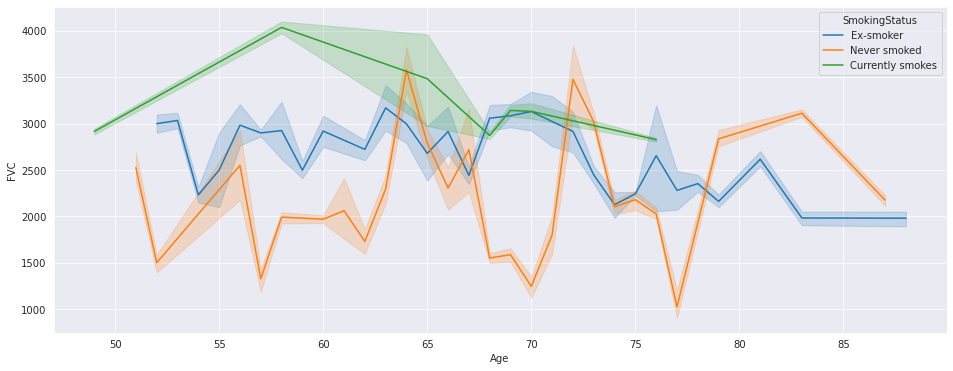

In [69]:
plt.figure(figsize=(16,6))
sns.lineplot(y=df_train['FVC'],x=df_train['Age'],hue=df_train['SmokingStatus'])
plt.show()

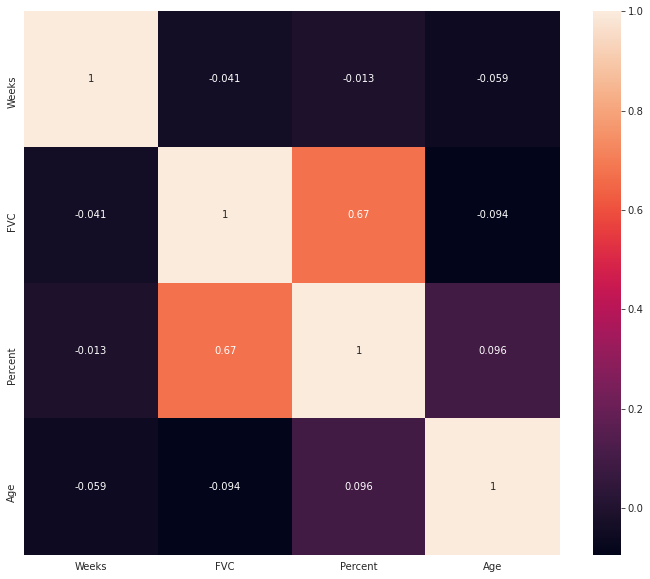

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

there is a high positive correlation between Percent and FVC.

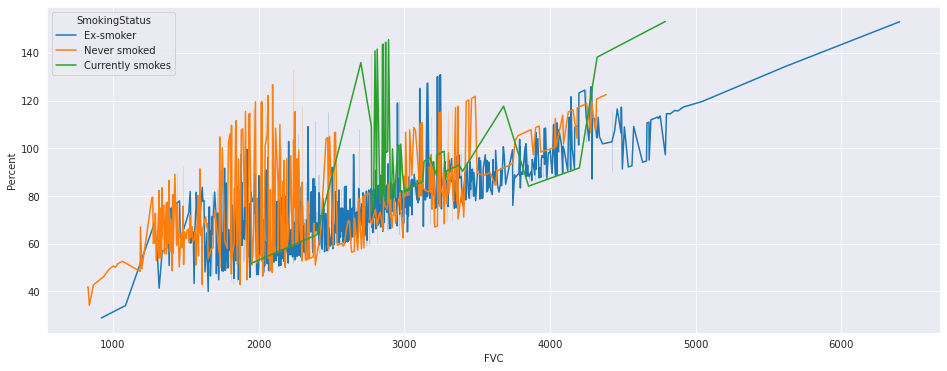

In [71]:
plt.figure(figsize=(16,6))
sns.lineplot(y = df_train['Percent'],x = df_train['FVC'],hue=df_train['SmokingStatus'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



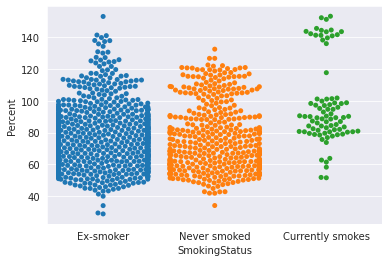

In [72]:
sns.swarmplot(y = df_train['Percent'],x=df_train['SmokingStatus'])
plt.show()

With swarmplot we can clearly identify the consequences of smoking on percent.

## Multivariate Analysis

Percent need to be between 80 and 120 for the patient to be considered "normal".

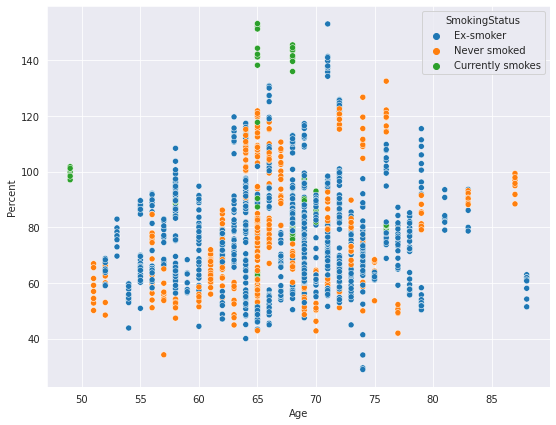

In [73]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = df_train['Age'],y=df_train['Percent'],hue=df_train['SmokingStatus']);

Our dataset "currently smokes" is quite small, but we can see that smoking is really dangerous for old people beacuse their percent is way too high (> 140%). For ex-smokers, it's more complicated, but it's visible (too low or too high).

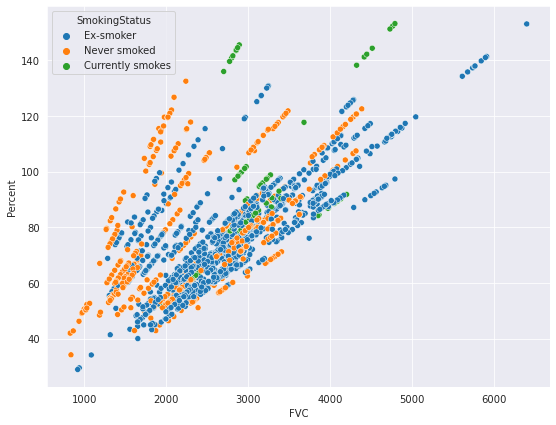

In [74]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = df_train['FVC'],y=df_train['Percent'],hue=df_train['SmokingStatus']);

In [75]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train,df_test])

X = df.drop(['Patient','Sex','SmokingStatus'],axis=1)
y = df.SmokingStatus

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [76]:
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)

LR_pred = LR.predict(X_test)

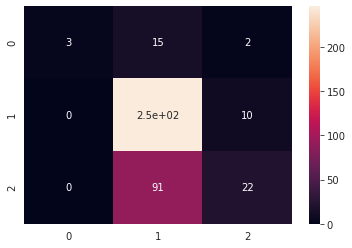

69.66580976863753


In [77]:
CM = confusion_matrix(y_test,LR_pred)

sns.heatmap(CM,annot=True)
plt.show()

print(accuracy_score(y_test,LR_pred)*100)

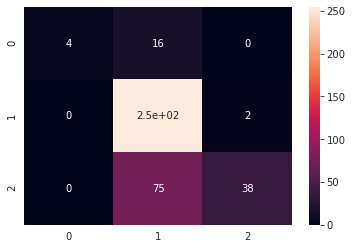

0.7609254498714653

In [78]:
ranfor = RandomForestClassifier(max_depth=4,random_state=1,)

ranfor.fit(X_train,y_train)


rf_pred = ranfor.predict(X_test)

CM2 = confusion_matrix(y_test,rf_pred)

sns.heatmap(CM2,annot=True)
plt.show()

accuracy_score(y_test,rf_pred)

# Classification of FVC

Here we are going to perform another category of classification, grouping the different values taken by the GCF to be able to determine whether a person is healthy or not.

In [79]:
list_health = []

for i in range(len(df_train)):
    if (df_train.Percent.iloc[i] >= 80 and df_train.Percent.iloc[i] <= 120):
        list_health.append('Healthy')
    elif (df_train.Percent.iloc[i] > 120):
        list_health.append('Too High')
    elif (df_train.Percent.iloc[i] <= 80):
        list_health.append('Too Low')

df_train['HealthCondition'] = list_health
df_train = df_train.drop("Percent",axis=1)

list_health2 = []

for i in range(len(df_test)):
    if (df_test.Percent.iloc[i] >= 80 and df_test.Percent.iloc[i] <= 120):
        list_health2.append('Healthy')
    elif (df_test.Percent.iloc[i] > 120):
        list_health2.append('Too High')
    elif (df_test.Percent.iloc[i] <= 80):
        list_health2.append('Too Low')

df_test['HealthCondition'] = list_health2
df_test = df_test.drop("Percent",axis=1)

df_train.head()

,Patient,Weeks,FVC,Age,Sex,SmokingStatus,HealthCondition
0,ID00007637202177411956430,-4,2315,79,Male,Ex-smoker,Too Low
1,ID00007637202177411956430,5,2214,79,Male,Ex-smoker,Too Low
2,ID00007637202177411956430,7,2061,79,Male,Ex-smoker,Too Low
3,ID00007637202177411956430,9,2144,79,Male,Ex-smoker,Too Low
4,ID00007637202177411956430,11,2069,79,Male,Ex-smoker,Too Low


In [80]:
from sklearn.preprocessing import LabelEncoder

s = (df_train.dtypes == 'object')
s = s.drop('HealthCondition')
object_cols = list(s[s].index)

# Make copy to avoid changing original data 
label_df_train = df_train.copy()
label_df_test = df_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_df_train[col] = label_encoder.fit_transform(df_train[col])
    label_df_test[col] = label_encoder.fit_transform(df_test[col])
    

df_train = label_df_train
df_test = label_df_test

df_train.head()

,Patient,Weeks,FVC,Age,Sex,SmokingStatus,HealthCondition
0,0,-4,2315,79,1,1,Too Low
1,0,5,2214,79,1,1,Too Low
2,0,7,2061,79,1,1,Too Low
3,0,9,2144,79,1,1,Too Low
4,0,11,2069,79,1,1,Too Low


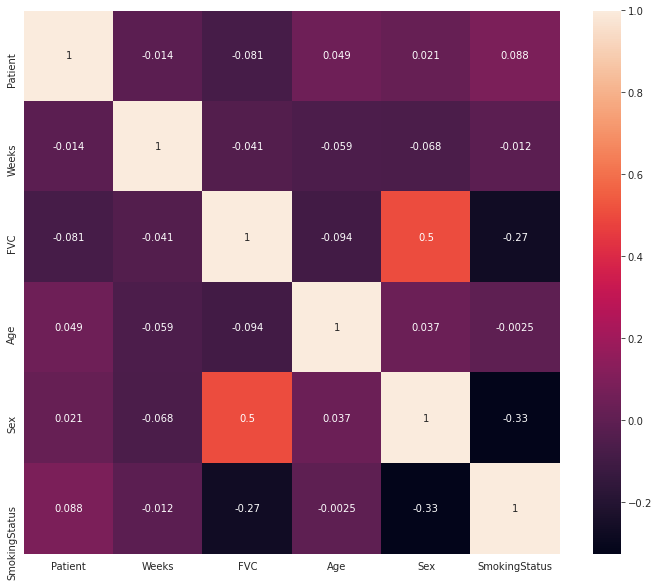

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

We can see here that by changing the categorical variables into quantitative variables (with Label Encoding), we can see that the FVC and Sex variables are relatively correlated.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



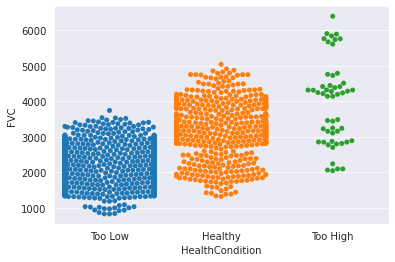

921
576
52


In [82]:
sns.swarmplot(y = df_train['FVC'],x=df_train['HealthCondition'])
plt.show()

print(df_train.HealthCondition[df_train.HealthCondition == 'Too Low'].count())
print(df_train.HealthCondition[df_train.HealthCondition == 'Healthy'].count())
print(df_train.HealthCondition[df_train.HealthCondition == 'Too High'].count())

In [84]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train,df_test])

X = df.drop(['HealthCondition'],axis=1)
y = df.HealthCondition

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [95]:
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)

LR_pred = LR.predict(X_test)

CM2 = confusion_matrix(y_test,LR_pred)

sns.heatmap(CM2,annot=True)
plt.show()

print("Accuracy obtained with logistic regression: ", accuracy_score(y_test,LR_pred)*100)

Accuracy obtained with logistic regression: 77.37789203084833


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



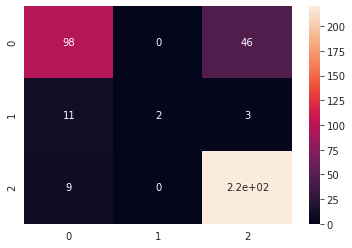

Accuracy obtained with random forest:  0.8226221079691517


In [98]:
ranfor = RandomForestClassifier(max_depth=4,random_state=1)

ranfor.fit(X_train,y_train)


rf_pred = ranfor.predict(X_test)

CM2 = confusion_matrix(y_test,rf_pred)

sns.heatmap(CM2,annot=True)
plt.show()

print("Accuracy obtained with random forest: ", accuracy_score(y_test,rf_pred))